In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_parquet("data/clean_base_table.parquet")
df.head()

,item_id,dept_id,cat_id,store_id,state_id,d,units_sold,date,wm_yr_wk,event_name_1,snap_CA,sell_price
0,FOODS_3_090,FOODS_3,FOODS,CA_1,CA,d_1,107,2011-01-29,11101,None,0,1.25
1,FOODS_3_120,FOODS_3,FOODS,CA_1,CA,d_1,0,2011-01-29,11101,None,0,NaN
2,FOODS_3_252,FOODS_3,FOODS,CA_1,CA,d_1,19,2011-01-29,11101,None,0,1.48
3,FOODS_3_586,FOODS_3,FOODS,CA_1,CA,d_1,42,2011-01-29,11101,None,0,1.48
4,FOODS_3_714,FOODS_3,FOODS,CA_1,CA,d_1,49,2011-01-29,11101,None,0,1.48


In [9]:
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19130 entries, 0 to 19129
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   item_id       19130 non-null  object        
 1   dept_id       19130 non-null  object        
 2   cat_id        19130 non-null  object        
 3   store_id      19130 non-null  object        
 4   state_id      19130 non-null  object        
 5   d             19130 non-null  object        
 6   units_sold    19130 non-null  int64         
 7   date          19130 non-null  datetime64[ns]
 8   wm_yr_wk      19130 non-null  int64         
 9   event_name_1  1540 non-null   object        
 10  snap_CA       19130 non-null  int64         
 11  sell_price    18402 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 1.8+ MB


,item_id,dept_id,cat_id,store_id,state_id,d,units_sold,date,wm_yr_wk,event_name_1,snap_CA,sell_price
count,19130,19130,19130,19130,19130,19130,19130.000000,19130,19130.000000,1540,19130.000000,18402.000000
unique,5,1,1,2,1,1913,NaN,NaN,NaN,30,NaN,NaN
top,FOODS_3_090,FOODS_3,FOODS,CA_1,CA,d_1,NaN,NaN,NaN,SuperBowl,NaN,NaN
freq,3826,19130,19130,9565,19130,10,NaN,NaN,NaN,60,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,32.167433,2013-09-10 23:59:59.999999744,11339.191323,NaN,0.329326,2.087491
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2011-01-29 00:00:00,11101.000000,NaN,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,2012-05-21 00:00:00,11217.000000,NaN,0.000000,1.480000
50%,NaN,NaN,NaN,NaN,NaN,NaN,28.000000,2013-09-11 00:00:00,11333.000000,NaN,0.000000,1.580000
75%,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,2015-01-02 00:00:00,11448.000000,NaN,1.000000,1.600000
max,NaN,NaN,NaN,NaN,NaN,NaN,599.000000,2016-04-24 00:00:00,11613.000000,NaN,1.000000,4.980000


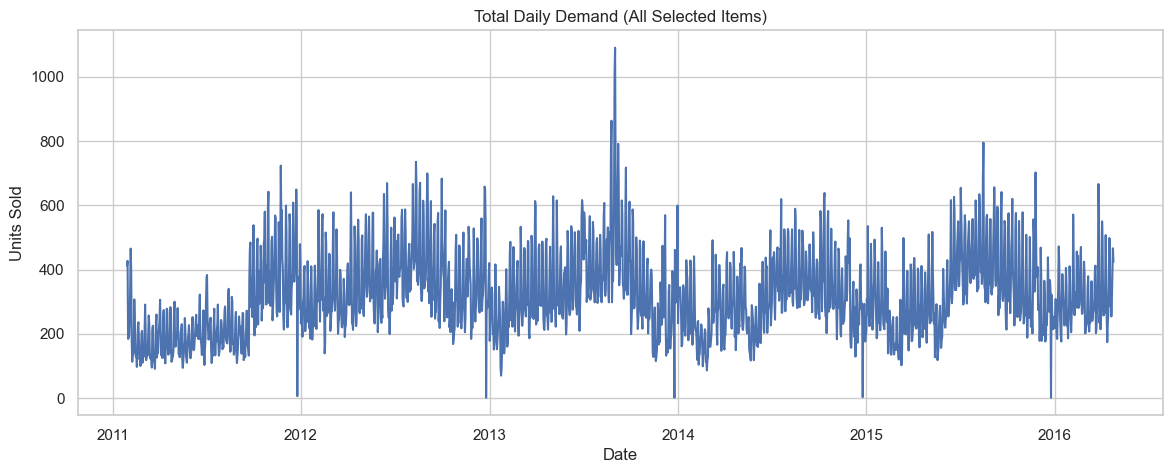

In [11]:
daily_demand = (
    df.groupby("date")["units_sold"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(14,5))
plt.plot(daily_demand["date"], daily_demand["units_sold"])
plt.title("Total Daily Demand (All Selected Items)")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.show()

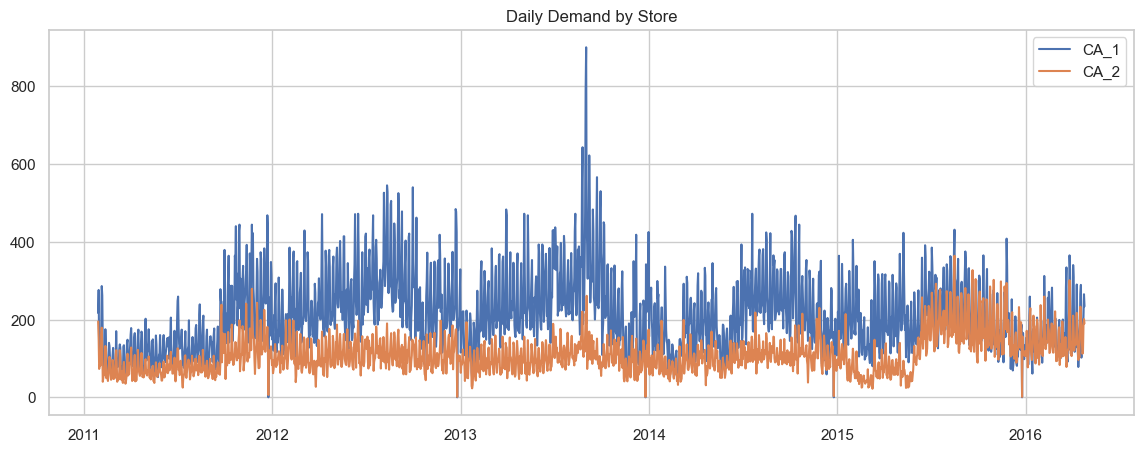

In [12]:
store_demand = (
    df.groupby(["date", "store_id"])["units_sold"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(14,5))
for store in store_demand["store_id"].unique():
    subset = store_demand[store_demand["store_id"] == store]
    plt.plot(subset["date"], subset["units_sold"], label=store)

plt.legend()
plt.title("Daily Demand by Store")
plt.show()

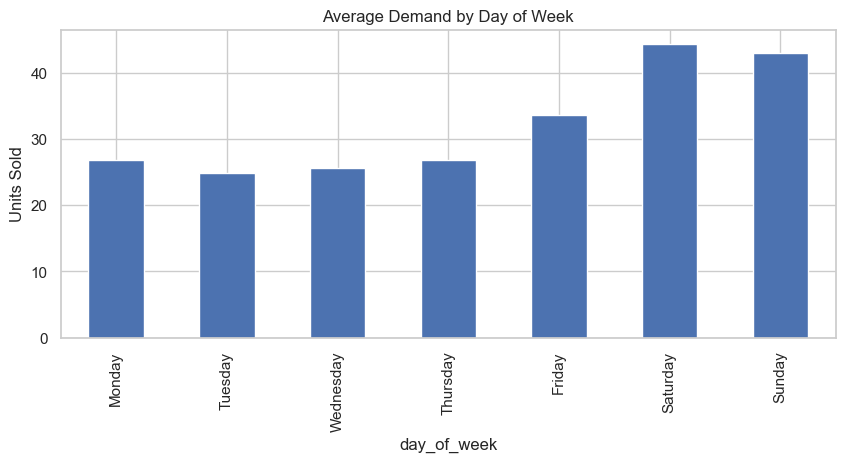

In [13]:
df["day_of_week"] = df["date"].dt.day_name()

weekly_pattern = (
    df.groupby("day_of_week")["units_sold"]
    .mean()
    .reindex(
        ["Monday", "Tuesday", "Wednesday", "Thursday", 
         "Friday", "Saturday", "Sunday"]
    )
)

weekly_pattern.plot(kind="bar", figsize=(10,4))
plt.title("Average Demand by Day of Week")
plt.ylabel("Units Sold")
plt.show()

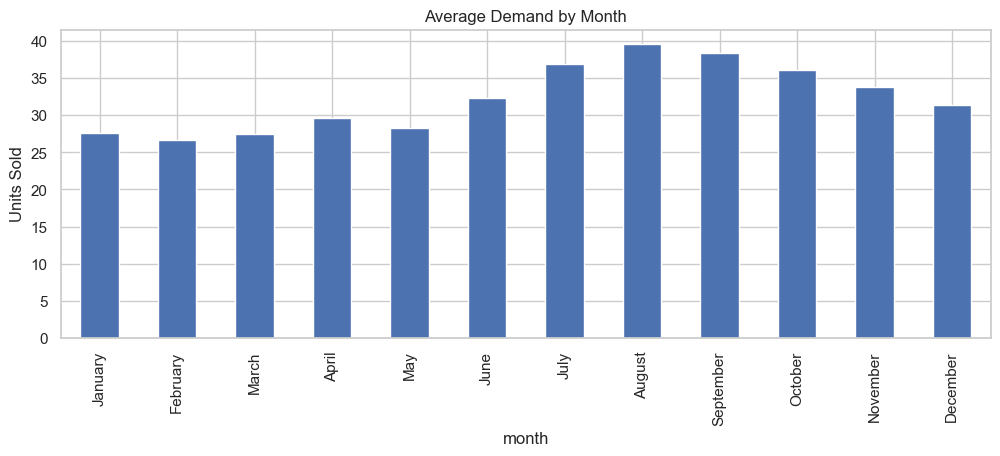

In [14]:
df["month"] = df["date"].dt.month_name()

monthly_pattern = (
    df.groupby("month")["units_sold"]
    .mean()
    .reindex([
        "January", "February", "March", "April", "May", "June",
        "July", "August", "September", "October", "November", "December"
    ])
)

monthly_pattern.plot(kind="bar", figsize=(12,4))
plt.title("Average Demand by Month")
plt.ylabel("Units Sold")
plt.show()

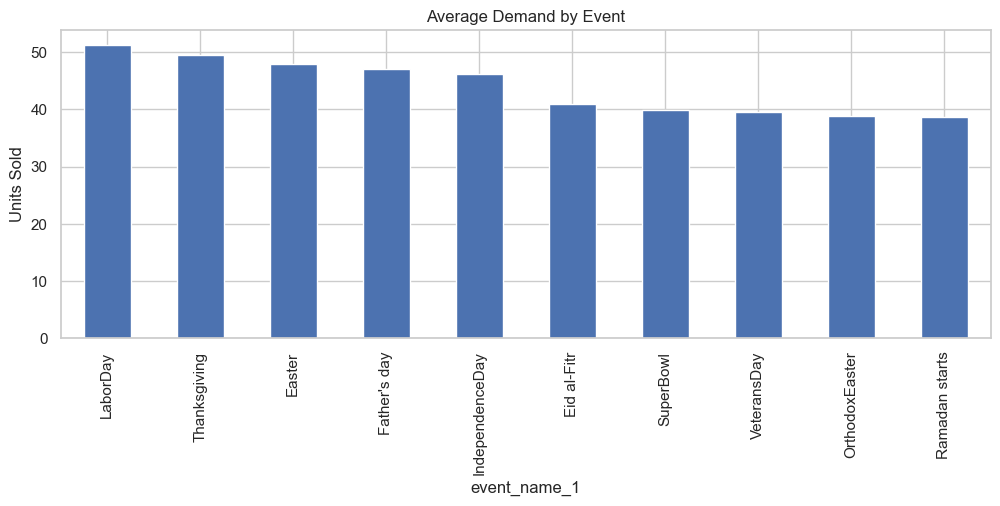

In [15]:
event_impact = (
    df.groupby("event_name_1")["units_sold"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

event_impact.plot(kind="bar", figsize=(12,4))
plt.title("Average Demand by Event")
plt.ylabel("Units Sold")
plt.show()

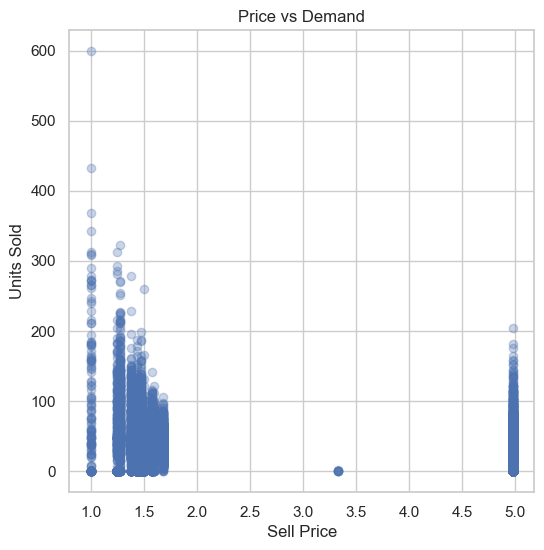

In [16]:
price_demand = df[df["sell_price"].notna()]

plt.figure(figsize=(6,6))
plt.scatter(
    price_demand["sell_price"],
    price_demand["units_sold"],
    alpha=0.3
)
plt.xlabel("Sell Price")
plt.ylabel("Units Sold")
plt.title("Price vs Demand")
plt.show()

In [17]:
price_demand[["sell_price", "units_sold"]].corr()

,sell_price,units_sold
sell_price,1.000000,-0.154562
units_sold,-0.154562,1.000000


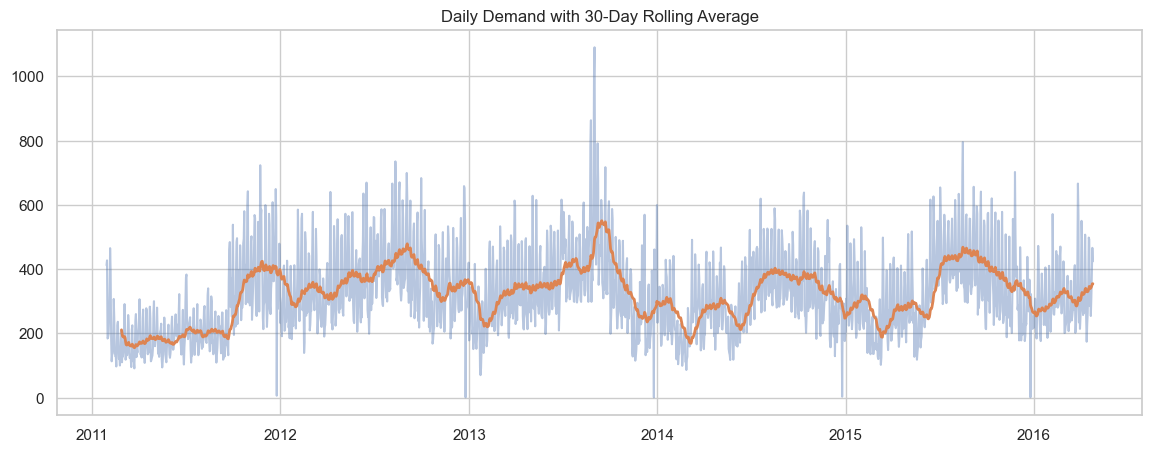

In [18]:
daily_demand["rolling_30"] = daily_demand["units_sold"].rolling(30).mean()

plt.figure(figsize=(14,5))
plt.plot(daily_demand["date"], daily_demand["units_sold"], alpha=0.4)
plt.plot(daily_demand["date"], daily_demand["rolling_30"], linewidth=2)
plt.title("Daily Demand with 30-Day Rolling Average")
plt.show()

- Demand shows strong weekly seasonality with weekend peaks

- Prices exhibit negative correlation with demand, indicating elasticity

- Event days significantly increase average demand

- Store-level demand trends differ, justifying hierarchical models